In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# random seed
np.random.seed(5)

/Users/hoondori/pyenv/myenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/hoondori/pyenv/myenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
# prepare data 
dataset = np.loadtxt('./pima-indians-diabetes.data', delimiter=',')
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]


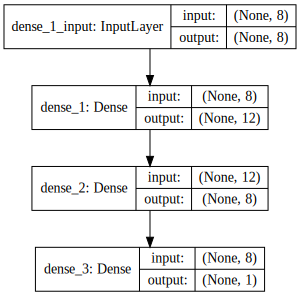

In [4]:
# model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
# train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64)

Epoch 1/1500
700/700 [==============================] - 0s 651us/step - loss: 0.4286 - acc: 0.7900
Epoch 2/1500
700/700 [==============================] - 0s 65us/step - loss: 0.4155 - acc: 0.7971
Epoch 3/1500
700/700 [==============================] - 0s 64us/step - loss: 0.4124 - acc: 0.8000
Epoch 4/1500
700/700 [==============================] - 0s 72us/step - loss: 0.4077 - acc: 0.7957
Epoch 5/1500
700/700 [==============================] - 0s 56us/step - loss: 0.4053 - acc: 0.8000
Epoch 6/1500
700/700 [==============================] - 0s 71us/step - loss: 0.4058 - acc: 0.8043
Epoch 7/1500
700/700 [==============================] - 0s 66us/step - loss: 0.4052 - acc: 0.8014
Epoch 8/1500
700/700 [==============================] - 0s 72us/step - loss: 0.4043 - acc: 0.8057
Epoch 9/1500
700/700 [==============================] - 0s 73us/step - loss: 0.4081 - acc: 0.8057
Epoch 10/1500
700/700 [==============================] - 0s 67us/step - loss: 0.4117 - acc: 0.7971
Epoch 11/1500
700/

In [10]:
# evaluate

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 1ms/step
acc: 76.47%


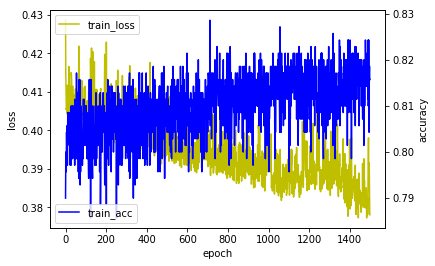

In [11]:
# draw history

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'],'y', label='train_loss')
acc_ax.plot(hist.history['acc'],'b', label='train_acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
